#Ujian Praktik Deployment

**Kelompok Predict 1**

* **Dimas Budi Utomo**
* **Muhammad Fikri Akbar**
* **Nurjanah**
* **Risma Nur Antika**
* **Zaki Maulana Rabbani**

Pada ujian praktik deployment ini kami menggunakan model computer vision yang digunakan untuk melakukan image classification yang mampu mengklasifikasikan gambar 9 jenis makanan padang. Hasil model ini kemudian disimpan yang kemudian akan di deploy dalam bentuk web.

In [1]:
#proses mount ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Data Acquisition<h1>

Dataset yang didapatkan meruakan dataset gambar dari makanan padang yang terdiri dari 9 jenis makanan yaitu ayam goreng, ayam pop, daging rendang, dendeng batokok, gulai ikan, gulai tambusu, gulai tunjang,telur balado, dan telur dadar. Terdapat juga gambar test untuk mengecek apakah model yang dihasilkan dapat memprediksi gambar ini.

In [2]:
#proses data acquisition dengan melakukan ekstrak file zip ke google drive
import os
import zipfile

In [3]:
#directory untuk data train ayam goreng
train_ayam_goreng = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/ayam_goreng')

#directory untuk data train ayam pop
train_ayam_pop = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/ayam_pop')

#directory untuk data train daging rendang
train_daging_rendang = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/daging_rendang')

#directory untuk data train dendeng batokok
train_dendeng_batokok = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/dendeng_batokok')

#directory untuk data train gulai ikan
train_gulai_ikan = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/gulai_ikan')

#directory untuk data train gulai tambusu
train_gulai_tambusu = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/gulai_tambusu')

#directory untuk data train gulai tunjang
train_gulai_tunjang = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/gulai_tunjang')

#directory untuk data train telur balado
train_telur_balado = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/telur_balado')

#directory untuk data train telur dadar
train_telur_dadar = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train/telur_dadar')

#directory untuk data test
test_dir = os.path.join('/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/test')

<h1>Data Visualization<h1>

Pada bagian data visualization ini saya tunjukkan beberapa sampel data dan penyebarannya, tujuannya adalah agar lebih memahami bagaimana bentuk dan isi dari dataset yang dimiliki. Visualisasi yang saya lakukan mulai dari melakukan print beberapa sampel gambar dan juga nama filenya dari setiap jenis makanan.

In [4]:
#melakukan print 10 nama file gambar pertama untuk ayam goreng
train_ayamgoreng_names = os.listdir(train_ayam_goreng)
print('Gambar ayam goreng: ',train_ayamgoreng_names[:10])

#melakukan print 10 nama file gambar pertama untuk ayam pop
train_ayampop_names = os.listdir(train_ayam_pop)
print('Gambar ayam pop: ',train_ayampop_names[:10])

#melakukan print 10 nama file gambar pertama untuk daging rendang
train_dagingrendang_names = os.listdir(train_daging_rendang)
print('Gambar daging rendang: ',train_dagingrendang_names[:10])

#melakukan print 10 nama file gambar pertama untuk dendeng batokok
train_dendengbatokok_names = os.listdir(train_dendeng_batokok)
print('Gambar dendeng batokok: ',train_dendengbatokok_names[:10])

#melakukan print 10 nama file gambar pertama untuk gulai ikan
train_gulaiikan_names = os.listdir(train_gulai_ikan)
print('Gambar gulai ikan: ',train_gulaiikan_names[:10])

#melakukan print 10 nama file gambar pertama untuk gulai tambusu
train_gulaitambusu_names = os.listdir(train_gulai_tambusu)
print('Gambar gulai tambusu: ',train_gulaitambusu_names[:10])

#melakukan print 10 nama file gambar pertama untuk gulai tunjang
train_gulaitunjang_names = os.listdir(train_gulai_tunjang)
print('Gambar gulai tunjang: ',train_gulaitunjang_names[:10])

#melakukan print 10 nama file gambar pertama untuk telur balado
train_telurbalado_names = os.listdir(train_telur_balado)
print('Gambar telur balado: ',train_telurbalado_names[:10])

#melakukan print 10 nama file gambar pertama untuk telur dadar
train_telurdadar_names = os.listdir(train_telur_dadar)
print('Gambar telur dadar: ',train_telurdadar_names[:10])

#melakukan print 10 nama file gambar pertama untuk testing
test_names = os.listdir(test_dir)
print('Gambar test: ',test_names[:10])

Gambar ayam goreng:  ['ayam_goreng (12).jpg', 'ayam_goreng (101).jpg', 'ayam_goreng (33).jpg', 'ayam_goreng (11).jpg', 'ayam_goreng (34).jpg', 'ayam_goreng (106).jpg', 'ayam_goreng (102).jpg', 'ayam_goreng (21).jpg', 'ayam_goreng (103).jpg', 'ayam_goreng (29).jpg']
Gambar ayam pop:  ['ayam_pop (107).jpg', 'ayam_pop (10).jpg', 'ayam_pop (112).jpg', 'ayam_pop (104).jpg', 'ayam_pop (100).jpg', 'ayam_pop (103).jpg', 'ayam_pop (108).jpg', 'ayam_pop (11).jpg', 'ayam_pop (101).jpg', 'ayam_pop (105).jpg']
Gambar daging rendang:  ['daging_rendang (67).jpg', 'daging_rendang (47).jpg', 'daging_rendang (59).jpg', 'daging_rendang (2).jpg', 'daging_rendang (48).jpg', 'daging_rendang (45).jpg', 'daging_rendang (40).jpg', 'daging_rendang (26).jpg', 'daging_rendang (27).jpg', 'daging_rendang (39).jpg']
Gambar dendeng batokok:  ['dendeng_batokok (53).jpg', 'dendeng_batokok (41).jpg', 'dendeng_batokok (100).jpg', 'dendeng_batokok (23).jpg', 'dendeng_batokok (51).jpg', 'dendeng_batokok (36).jpg', 'dendeng

In [ ]:
#melakukan print jumalh gambar dari setiap jenis hewan
print('total gambar ayam goreng:', len(os.listdir(train_ayam_goreng)))
print('total gambar ayam pop:', len(os.listdir(train_ayam_pop)))
print('total gambar daging rendang:', len(os.listdir(train_daging_rendang)))
print('total gambar dendeng batokok:', len(os.listdir(train_dendeng_batokok)))
print('total gambar gulai ikan:', len(os.listdir(train_gulai_ikan)))
print('total gambar gulai tambusu:', len(os.listdir(train_gulai_tambusu)))
print('total gambar gulai tunjang:', len(os.listdir(train_gulai_tunjang)))
print('total gambar telur balado:', len(os.listdir(train_telur_balado)))
print('total gambar telur dadar:', len(os.listdir(train_telur_dadar)))

print('total gambar test:', len(os.listdir(test_dir)))

total gambar ayam goreng: 107
total gambar ayam pop: 113
total gambar daging rendang: 104
total gambar dendeng batokok: 109
total gambar gulai ikan: 111
total gambar gulai tambusu: 103
total gambar gulai tunjang: 119
total gambar telur balado: 111
total gambar telur dadar: 116
total gambar test: 45


In [ ]:
#melakukan print beberapa sampel dari data training yang ada
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameter grafik
nrows = 9
ncols = 9

#iterasi untuk gambar
pic_index = 0

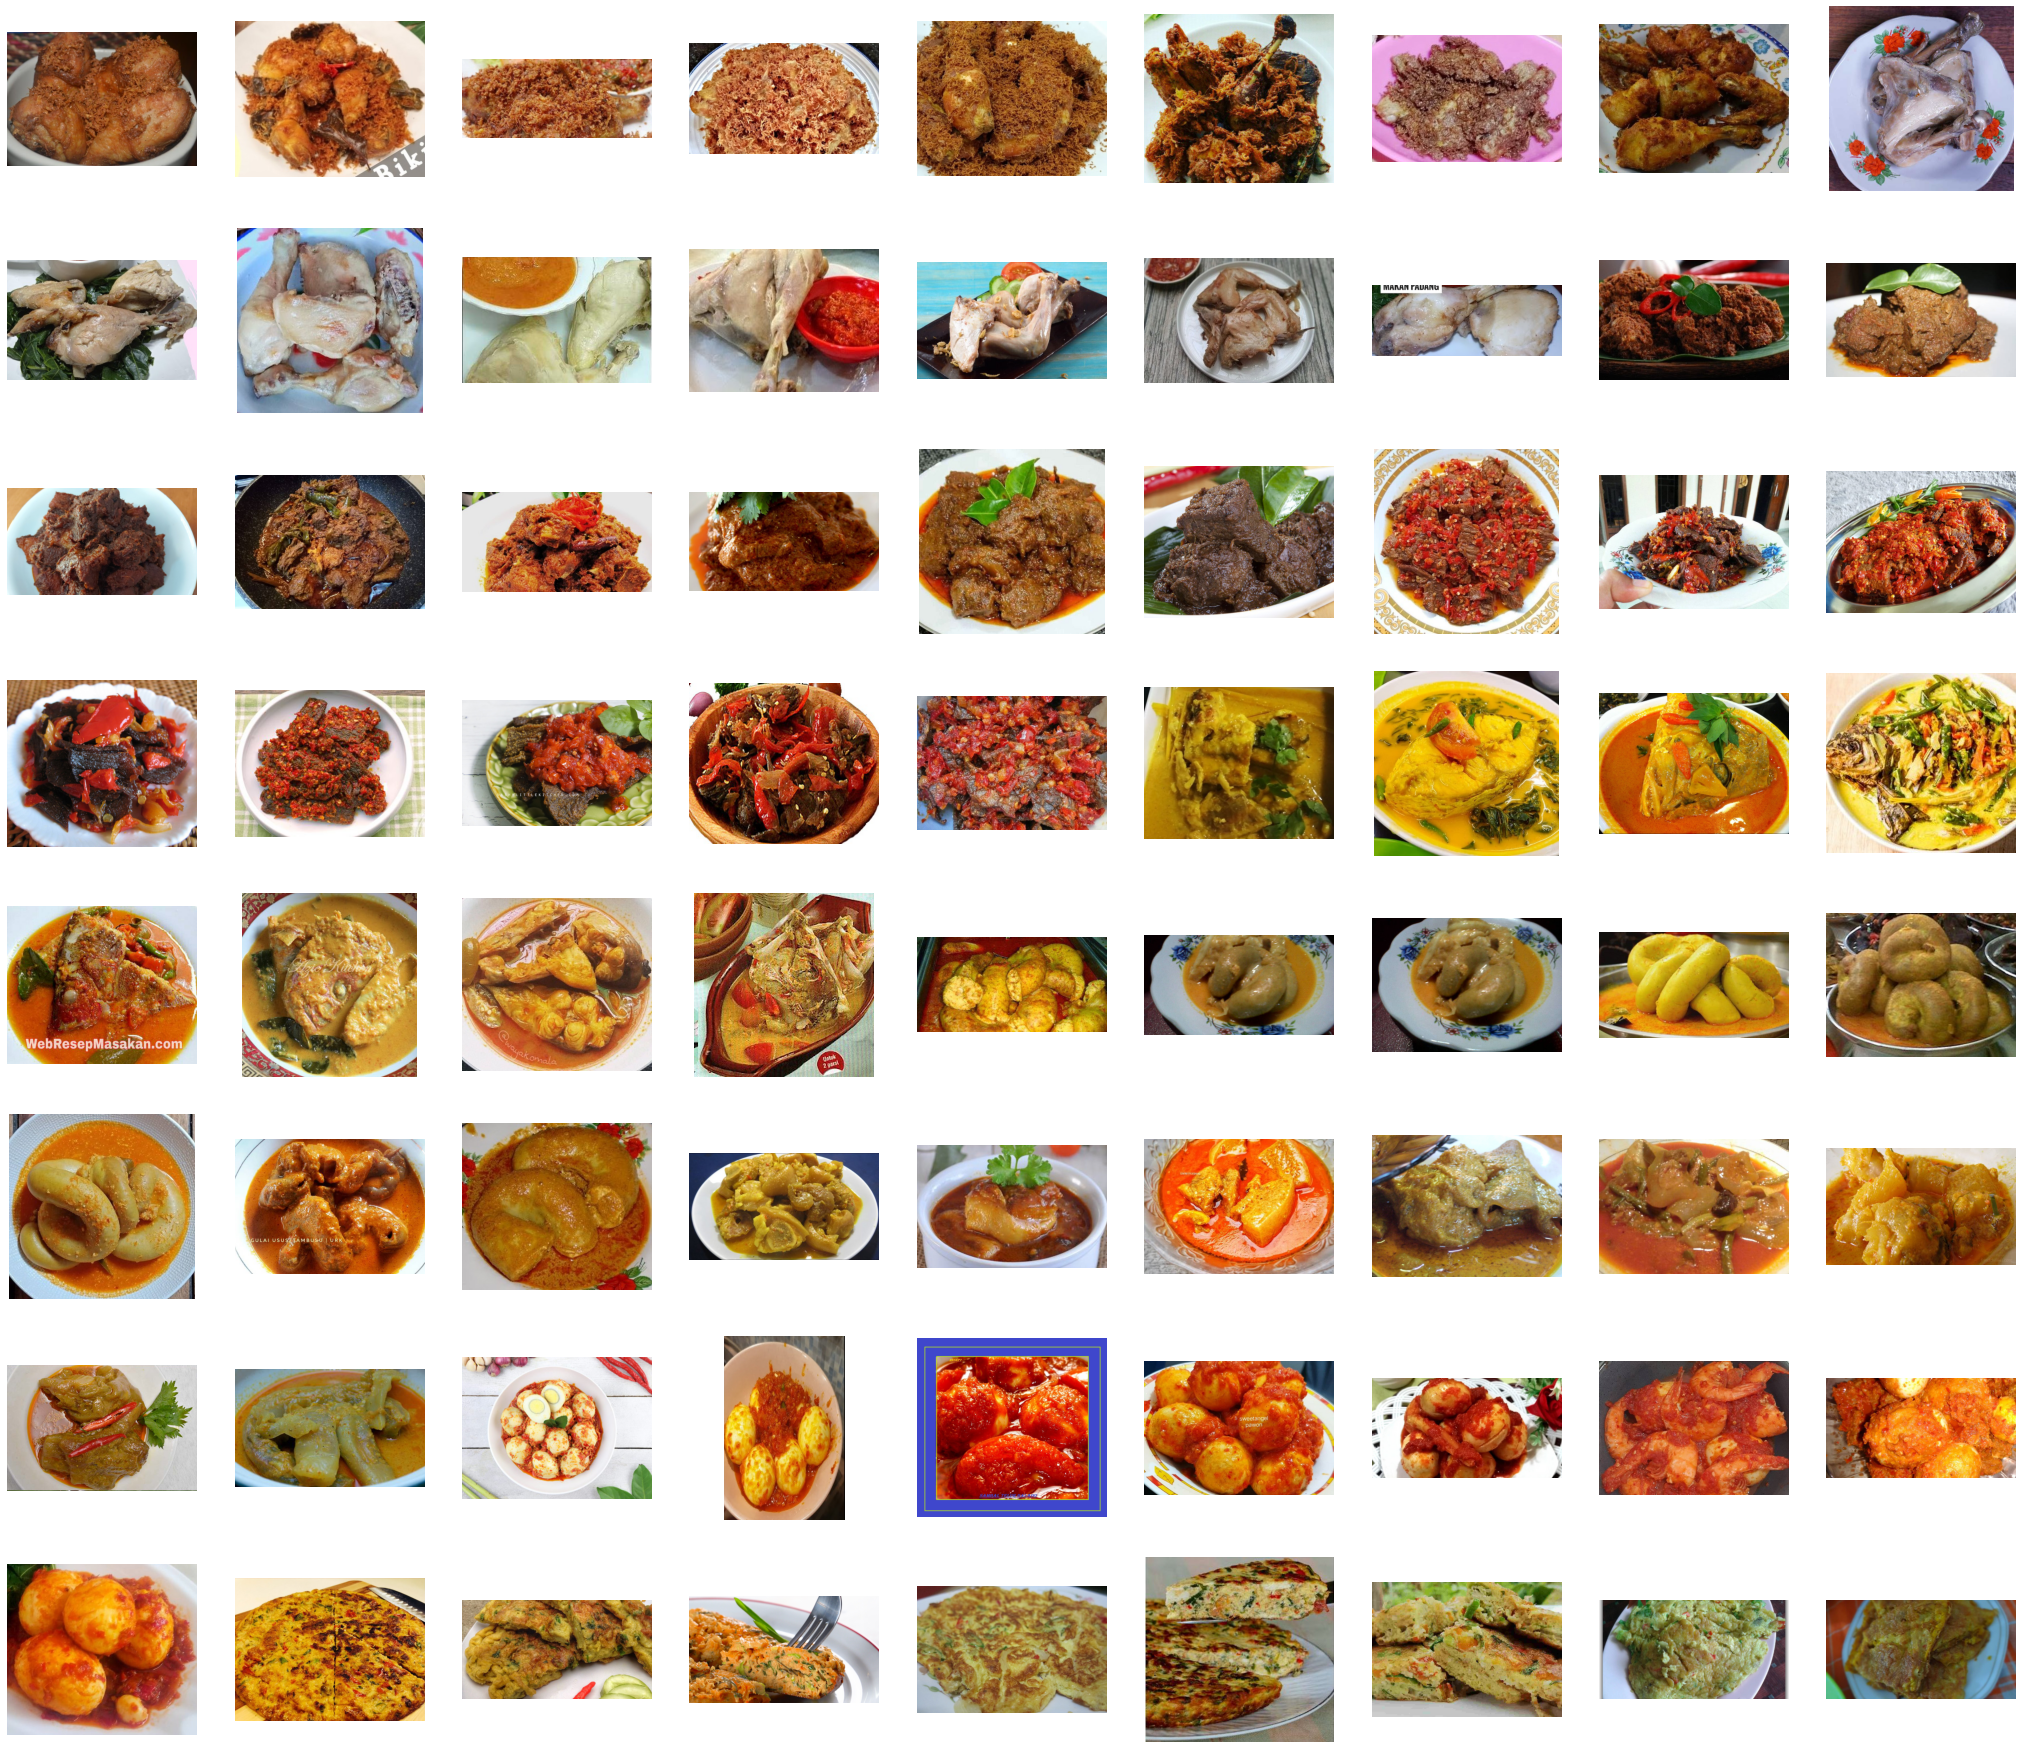

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ayamgoreng_pic = [os.path.join(train_ayam_goreng, fname) 
                for fname in train_ayamgoreng_names[pic_index-8:pic_index]]
next_ayampop_pic = [os.path.join(train_ayam_pop, fname) 
                for fname in train_ayampop_names[pic_index-8:pic_index]]
next_dagingrendang_pic = [os.path.join(train_daging_rendang, fname) 
                for fname in train_dagingrendang_names[pic_index-8:pic_index]]
next_dendengbatokok_pic = [os.path.join(train_dendeng_batokok, fname) 
                for fname in train_dendengbatokok_names[pic_index-8:pic_index]]
next_gulaiikan_pic = [os.path.join(train_gulai_ikan, fname) 
                for fname in train_gulaiikan_names[pic_index-8:pic_index]]
next_gulaitambusu_pic = [os.path.join(train_gulai_tambusu, fname) 
                for fname in train_gulaitambusu_names[pic_index-8:pic_index]]
next_gulaitunjang_pic = [os.path.join(train_gulai_tunjang, fname) 
                for fname in train_gulaitunjang_names[pic_index-8:pic_index]]
next_telurbalado_pic = [os.path.join(train_telur_balado, fname) 
                for fname in train_telurbalado_names[pic_index-8:pic_index]]
next_telurdadar_pic = [os.path.join(train_telur_dadar, fname) 
                for fname in train_telurdadar_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ayamgoreng_pic + next_ayampop_pic + next_dagingrendang_pic + next_dendengbatokok_pic + next_gulaiikan_pic + next_gulaitambusu_pic + next_gulaitunjang_pic + next_telurbalado_pic + next_telurdadar_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

<h1>Preprocessing Gambar<h1>

Pada bagian preprocessing ini, dataset gambar dipersiapkan sebelum masuk ke bagian model. Hal ini diperlukan agar setiap gambar yang masuk memiliki 'bentuk' yang sama sehingga proses dan hasil dari training nantinya bisa lebih baik. Selain itu, kita juga akan memisahkan dataset training dan juga testing.

Pertama, kita deklarasikan variabel image_datagen dengan menggunakan library ImageDataGenerator kita bisa melakukan perubahan pada gambar mulai dari rescale, mengubah ukurannya, melakukan rotasi dan juga membagi gambar menjadi training (80%) dan validation/test (20%). Selanjutnya kita deklarasikan variabel untuk data training yaitu train generator lalu kita ubah sesuai denga parameter dari image_datagen, kita berikan path dari data training tersebut, nilai ukuran target yaitu 200x200 dengan ukuran batch 16. Untuk proses data testing sama dengan data training namun disini kita bisa lihat bahwa untuk data test/validation kita tetap gunakan file gambar dari folder train hal ini dilakukan karena pada folder test setiap jenis gambar belum terpisah sehingga kita ambil dari folder train yang telah terpisah.

Hasil dari preprocessing ini menunjukkan ada 799 gambar untuk training dan 194 gambar untuk test/validation yang terbagi menjadi 9 kelas.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#gambar akan di rescaling menjadi 1./255
image_datagen = ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True, validation_split=0.2)

#membuat variabel untuk training dengan nama train generator menggunakan image_datagen
train_generator = image_datagen.flow_from_directory(
        '/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train',  #directory untuk data train
        subset= 'training',
        target_size=(200, 200),  #gambar diresize menjadi 224x224
        batch_size=16)   #batch size digunakan 16

#membuat variabel untuk training dengan nama test generator menggunakan image_datagen
test_generator = image_datagen.flow_from_directory(
        '/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/train',  #directory untuk data test
        subset= 'validation',
        target_size=(200, 200),  #gambar diresize menjadi 224x224
        batch_size=16)   #batch size digunakan 16

Found 799 images belonging to 9 classes.
Found 194 images belonging to 9 classes.


<h1>Modelling<h1>

Pada bagian modeling ini kita akan membentuk model dengan memanfaatkan transfer learning agar hasil akurasi yang baik. Pertama kita deklarasikan dulu library yang dibutuhkan mulai dari tensorflow, numpy, sklearn, keras, dll. Kita akan menggunakan model transfer learning yaitu DenseNet121 yang bisa diimport melalui library keras.Kita deklarasikan model DenseNet121 ini dengan beberapa parameternya, mulai dari include_top dengan nilai False, weights menggunakan imagenet, dan input_shape mengikuti shape gambar saaat preprocessing tadi yaitu 224*224 dengan channel 3. Setelah itu dihubungkan dengan fully connected layer dengan fungsi aktivasi ReLu dan softmax karena klasifikasi gambar bersifat kategorikal lebih dari 2.

Setelah modeling selesai maka model ini dicompile dengan memanfaatkan optimizer SGD dengan learning rate 0.0005 dan momentum 0.9. Untuk loss digunakan categorical_crossentropy karena kelas yang lebih dari 2 dan digunakan metricsnya akurasi.

In [ ]:
#deklarasi library
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import joblib

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, GlobalAveragePooling2D
from keras import activations

In [ ]:
#modelling

#menggunakan densenet sebagai model transfer learning
DenseNet = tf.keras.applications.DenseNet121(input_shape=(200 , 200, 3),
                                                 include_top=False,
                                                 weights='imagenet')

#digabungkan dengan fully connected layer
model = Sequential()
model.add(DenseNet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(9, activation="softmax" , name="classification"))

In [ ]:
#model dicompile dengan optimizers SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

<h1>Training<h1>

Model ini kemudian ditraining dengan data dari train_generator yang merupakan data training, untuk validation_data menggunakan test_generator yang merupakan data test atau validasi dengan epoch 10.

Untuk hasil akhirnya dapat dilihat model ini menghasilakan akurasi model 94.24% dengan loss 16.21%.

In [ ]:
#dilakukan training dengan 10 epoch
history = model.fit(train_generator , validation_data = test_generator , epochs = 10)

Epoch 1/10
50/50 [==============================] - 32s 434ms/step - loss: 1.9462 - accuracy: 0.3154 - val_loss: 1.4248 - val_accuracy: 0.4742
Epoch 2/10
50/50 [==============================] - 21s 409ms/step - loss: 0.9072 - accuracy: 0.7384 - val_loss: 0.6361 - val_accuracy: 0.7990
Epoch 3/10
50/50 [==============================] - 19s 387ms/step - loss: 0.5438 - accuracy: 0.8411 - val_loss: 0.4376 - val_accuracy: 0.8814
Epoch 4/10
50/50 [==============================] - 19s 386ms/step - loss: 0.3753 - accuracy: 0.8986 - val_loss: 0.3191 - val_accuracy: 0.9072
Epoch 5/10
50/50 [==============================] - 19s 384ms/step - loss: 0.2301 - accuracy: 0.9412 - val_loss: 0.3257 - val_accuracy: 0.8866
Epoch 6/10
50/50 [==============================] - 21s 419ms/step - loss: 0.2394 - accuracy: 0.9274 - val_loss: 0.2919 - val_accuracy: 0.8969
Epoch 7/10
50/50 [==============================] - 19s 384ms/step - loss: 0.1883 - accuracy: 0.9474 - val_loss: 0.2842 - val_accuracy: 0.9072

<h1>Evaluasi Model<h1>

Model yang sudah ditraining kemudian kita evaluasi dengan menggunakan test_generator, hasilnya akan diplot untuk menunjukkan nilai loss dan validasi loss juga akurasi dan akurasi validasi.

Dari hasil evaluasi ini dapat dilihat bahwa model yang dibuat memiliki akurasi 95.18%.

13/13 [==============================] - 4s 270ms/step - loss: 0.2029 - accuracy: 0.9330


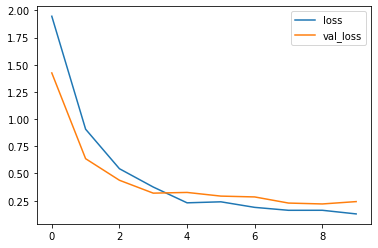

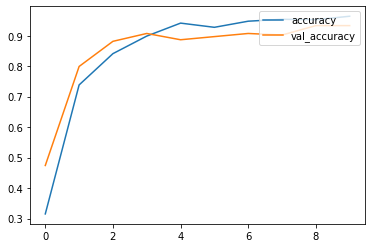

In [ ]:
#model di evaluasi dan di plot lossnya
model.evaluate(test_generator)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

<h1>Output Program<h1>

In [ ]:
#membuat file csv untuk submission berdasarkan contoh yang ada
sub_csv ='/content/drive/MyDrive/Ujian Praktik Computer Vision/Sample_submission2.csv'  #directory untuk sample submission
path_test = '/content/drive/MyDrive/Ujian Praktik Computer Vision/dataset_padang_food/test'  #directory untuk data test

In [ ]:
import pandas as pd

#membuka file sample submission
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

ID  Label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0
5   6      0
6   7      0
7   8      0
8   9      0
9  10      0

In [ ]:
#proses labelling untuk setiap gambar pada data test

from tensorflow.keras.preprocessing.image import load_img

labels = []

for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))

1/1 [==============================] - 0s 35ms/step


In [ ]:
#label yang sudah dihasilkan diinput pada label yang sebelumnya kosong 
    
df_sub['Label'] = labels
df_sub.head(45)

ID  Label
0    1      2
1    2      0
2    3      0
3    4      0
4    5      0
5    6      1
6    7      1
7    8      1
8    9      1
9   10      2
10  11      1
11  12      2
12  13      2
13  14      2
14  15      2
15  16      3
16  17      3
17  18      3
18  19      3
19  20      3
20  21      4
21  22      4
22  23      4
23  24      4
24  25      4
25  26      5
26  27      4
27  28      5
28  29      5
29  30      5
30  31      6
31  32      6
32  33      6
33  34      6
34  35      6
35  36      7
36  37      7
37  38      7
38  39      7
39  40      7
40  41      8
41  42      8
42  43      8
43  44      8
44  45      8

In [ ]:
#dibuat file csv baru untuk menampung hasil labeling
df_sub.to_csv('/content/drive/MyDrive/Ujian Praktik Computer Vision/Hasil Model/Submission_file.csv',index=False)

In [ ]:
joblib.dump((model), "/content/drive/MyDrive/Ujian Praktik Computer Vision/model_makanan_cv2.model")

['/content/drive/MyDrive/Ujian Praktik Computer Vision/model_makanan_cv2.model']

In [ ]:
model.save_weights("/content/drive/MyDrive/Ujian Praktik Computer Vision/model_makanan_cv44.h5")